In [1]:
import scipy.stats as stats
from scipy.integrate import quad
import scipy
import numpy as np
import pandas as pd
import time
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
#load the parameters, and their short int feats?
parameters = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_266.csv", index_col =0 )
#parameters.head(5)
parameters[parameters["Gamma"]<1]

,ID,Gamma,Location,Alpha
40,13362.0,0.058621,1.874032,4.227547e-01
45,1364.0,0.278282,4.686833,8.645099e-02
53,1424.0,0.356004,4.091710,1.255441e+00
56,1449.0,0.856103,4.347785,9.457170e-01
62,1508.0,0.748105,4.173922,2.625615e-03
68,1601.0,0.890051,4.416612,3.363478e-02
104,1829.0,0.913575,5.110561,4.502986e-02
110,1848.0,0.650236,2.931098,5.483047e-01
118,1880.0,0.708941,4.461278,1.917586e-01
119,1886.0,0.356468,4.668548,1.209570e+00


In [3]:
short_feats = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col =0 )
short_feats.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
0,0000000.bin,10000.0,1.346025e-08,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,...,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,0.395531,0.0,1.235644e+07,1.099985e-04
1,0000001.bin,10000.0,8.934681e-10,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,...,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,0.403877,0.0,1.348749e+05,1.388587e-08
2,0000002.bin,10000.0,3.169983e-08,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,...,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,0.397334,0.0,1.276381e+04,3.048261e-04
3,0000003.bin,10000.0,6.097589e-10,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,...,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,0.391764,1.0,1.000000e+09,6.492574e-10
4,0000004.bin,10000.0,5.951220e-03,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,...,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,0.402905,0.0,8.791888e+01,9.336734e-07


In [4]:
subsystem = parameters["ID"].values.astype(int)
#print subsystem
sub_short = short_feats.loc[subsystem]
sub_short.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
1007,0001007.bin,10000.0,5.206029e-08,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,...,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08,0.388264,0.0,1.740364e+05,1.526402e-06
1021,0001021.bin,10000.0,4.398308e-09,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,...,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12,0.383372,0.0,2.689650e+06,1.961156e-07
1025,0001025.bin,10000.0,7.781939e-09,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,...,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12,0.382403,0.0,6.744500e+05,9.745464e-10
1041,0001041.bin,10000.0,1.961802e-09,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,...,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12,0.393527,0.0,7.144115e+05,1.061513e-07
10518,0010518.bin,10000.0,8.140560e-09,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,...,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12,0.314230,0.0,9.271272e+06,4.160501e-07


#do a check how manysytems are valid, as we are only considering systems with an instability time range between 10^4 to ~10^6 (<\10^7), but there are some with lower time scales

In [5]:
discard = sub_short[sub_short["instability_time"]<10000]
print discard.index
print discard.shape, sub_short.shape
discard

Int64Index([13362, 2008, 2105, 2128, 22032, 24013, 2612, 4641, 58, 7341, 8582], dtype='int64')
(11, 126) (266, 126)


,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
13362,0013362.bin,10000.000000,0.000321,15.180236,11.189947,-6.526938,32.075308,-1.758383,17.267010,-23.963283,...,2.388276,0.157065,0.018752,0.211224,0.003627,-5.543712e-10,0.350045,0.0,74.822493,5.935752e-08
2008,0002008.bin,10000.000000,0.001348,9.648130,2.145408,1.289986,11.389790,6.914694,4.494719,4.653474,...,0.030574,0.640889,0.373052,0.227041,0.006782,-1.067556e-08,0.337121,0.0,195.093640,1.324071e-06
2105,0002105.bin,10000.000000,0.091443,19.063635,3.436111,15.067219,27.800055,30.988660,18.261569,-2.304971,...,0.514317,2.447895,1.042210,7.464887,0.097789,7.777267e-07,0.395936,0.0,142.928813,3.060674e-06
2128,0002128.bin,9899.755103,0.001129,9.928947,1.485805,7.374275,11.839157,3.357271,5.066631,-4.212845,...,0.945496,1.132426,0.423725,3.547770,0.118831,6.977274e-08,0.385283,0.0,169.325268,1.658549e-06
22032,0022032.bin,9768.838945,0.016778,8.166863,13.073396,-8.465782,50.110106,17.832222,8.185106,-4.642923,...,0.087702,0.113300,0.039438,0.375961,0.115814,-6.031261e-10,0.413043,0.0,79.465169,1.199905e-05
24013,0024013.bin,10000.000000,0.055335,-4.408785,11.108835,-19.456597,11.933935,35.467347,38.363735,-5.001899,...,0.253701,1.189934,0.825351,4.201093,0.150344,-4.184932e-08,0.380108,0.0,92.075319,1.584756e-06
2612,0002612.bin,10000.000000,0.000008,8.283632,1.799103,3.160358,12.522809,14.883222,0.167518,14.707546,...,1.883693,0.125546,0.001741,0.482498,0.468737,-1.786871e-10,0.403102,0.0,575.317901,1.885941e-08
4641,0004641.bin,10000.000000,0.001398,5.860893,2.747184,0.724268,13.474425,25.025117,0.329004,24.112284,...,0.173387,0.043891,0.034162,0.103647,0.003224,6.031947e-12,0.404600,0.0,283.917037,3.190056e-06
58,0000058.bin,9918.423509,0.000250,27.792111,6.878077,16.112694,49.326185,2.959052,4.440089,-9.942672,...,2.523245,1.318133,0.087513,0.265713,0.025384,5.318945e-09,0.385044,0.0,5325.868318,1.959029e-08
7341,0007341.bin,9763.030115,0.001757,5.670086,8.931890,-15.126648,13.668682,15.729751,11.317428,-2.511966,...,0.255632,0.366331,0.355547,2.392509,0.026282,1.341146e-07,0.362352,0.0,583.527458,5.372349e-08


In [6]:
#need to do a double integral

def weib(loc, loc_fixed, gamma, alpha, x):
    #assume x is log t
    prob = (gamma/alpha)* ((loc-loc_fixed)/alpha)**(gamma-1.) * np.exp(-((loc-loc_fixed)/alpha)**gamma)
    dist = (gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)
    return prob*dist

In [7]:
#need to do a double integral
#x must be an ARRAY
def weib_pdf(x, loc,  gamma, alpha):
    #assume x is log t
    problematic = np.where(x<loc)[0]
    #print problematic
    fine = np.where(x>loc)[0]
    #print fine
    prob = np.zeros_like(x)
    #print x[fine]
    
    prob[fine] = (gamma/alpha)* ((x[fine]-loc)/alpha)**(gamma-1.) * np.exp(-((x[fine]-loc)/alpha)**gamma)
    #print prob[fine]
    prob[problematic]=0.
    return prob

In [8]:
#need to do a double integral
#x can be int or aray, but has poor error handling
def weib_pdf_val(x, loc,  gamma, alpha):
    #assume x is log t  
    prob = (gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)
    #print prob[fine]
    return prob

In [9]:
#2.61402658322 1.28337089098 4.44752697372
gamma = 2.61402658322
alpha = 1.28337089098
loc = 4.44752697372
x = 4.5
(gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)

0.011692716127467438

In [10]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

2010.0
0.995487475818 1.00588722353 3.86872595885 4.87018126838


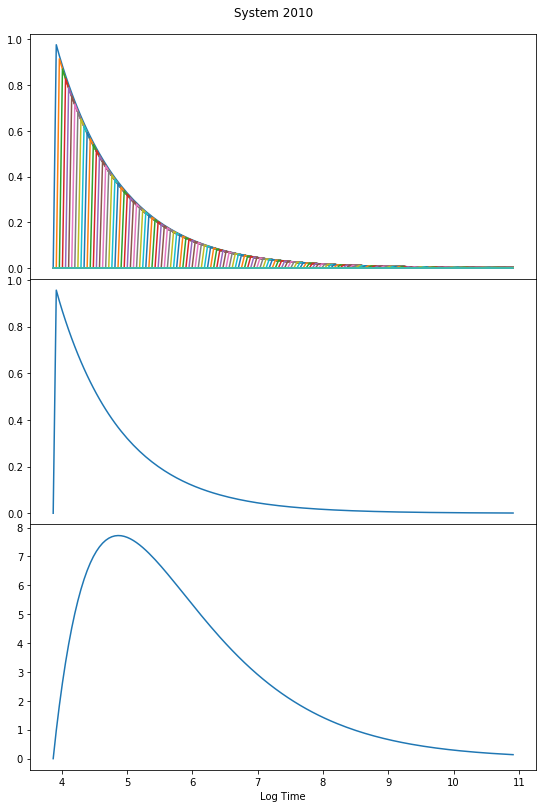

In [11]:
index_val = 144
#print 
label = parameters["ID"][index_val]
print label
gamma = parameters["Gamma"][index_val]
alpha = parameters["Alpha"][index_val]
loc = parameters["Location"][index_val]
x = np.log10(sub_short["instability_time"].values[index_val])
print gamma, alpha, loc, x 
from scipy.stats import norm
#fig = plt.figure(figsize=(8,12))
fig, (ax, ax2, ax3) = plt.subplots(3, sharex=True)
fig.tight_layout()
fig.set_size_inches((8, 12))
fig.suptitle("System {0}".format(int(label)))

fig.subplots_adjust(hspace=0)
#ax = fig.add_subplot("311")
width = 150

vals= np.linspace(loc+0.001, loc+alpha*7, width)
final_y  = np.zeros(width)
for i in range(int(vals.shape[0])):
    
    #try manually adding three different functions
    bins = np.linspace(loc , loc+7*alpha, width)
    val1 = vals[i]

    #print val1, loc, gamma, alpha
    prob = weib_pdf_val(val1, loc, gamma, alpha)
    #print prob
    y = prob*weib_pdf(bins, val1,gamma, alpha)
    #print y
    ax.plot(bins, y)
    final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  #np.nansum(a=[y, final_y], axis= 1)
    #print y[:10]
    #print final_y[:10]
    #break
    
    
#ax2 = fig.add_subplot("312")
ax2.plot(bins, weib_pdf(bins, loc,gamma, alpha))
#ax3 = fig.add_subplot("313")
final_y 
#print final_y
ax3.plot(bins, final_y)
ax3.set_xlabel("Log Time")





In [12]:
def rms_error(y_true, y_test):
    #assume the two are the same size, do a rsm error
    error = 1./2**0.5 *(y_true-y_test)
    return np.nansum(error)


21.008706374
19.788189739


0.90426753697895013

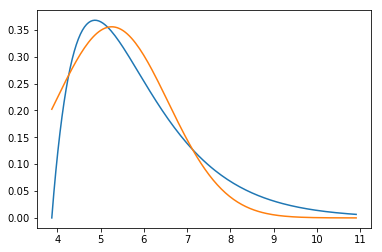

In [13]:
p0 = [1., loc+alpha*4, alpha] #norm, mean, sigma
coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0=p0)

# Get the fitted curve
hist_fit = gauss(bins, *coeff)

#incrementing step
delta_t = (( loc+7.*alpha) -loc)/(width-1)

summed_fit_area_weib = 0
#find the total sum of final_y to find normalizing constant
for val in final_y:
    summed_fit_area_weib+=  val*delta_t 
    # loc is start, loc+7*alpha is end, width here is the number of sampleing points
print summed_fit_area_weib


summed_fit_area_gauss = 0
for val in hist_fit:
    summed_fit_area_gauss+=  val*delta_t 
    # loc is start, loc+7*alpha is end, width here is the number of sampleing points
print summed_fit_area_gauss

#plot normalized curves for visual inspection
plt.plot(bins, final_y/summed_fit_area_weib)
plt.plot(bins, hist_fit/summed_fit_area_gauss)

overlapp = np.concatenate([(final_y/summed_fit_area_weib).reshape(width,1), 
                           (hist_fit/summed_fit_area_gauss).reshape(width, 1)], axis = 1)
#define IOU as the sum, of their overlap, so take the min of both and sum it multiplied by delta t 
overlapp.min(axis = 1).sum()*delta_t
#overlapped arel


Try doing this for all 145 systems

In [19]:
import time

In [29]:
start = time.time()
info = np.zeros((parameters.shape[0], 7)) # add norm const, RMS
corrupted = []
for index_val in range(int(parameters.shape[0])):
    width = 150 #incremental step

    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot("121")
    ax2 = fig.add_subplot("122")
    print index_val, 
    gamma = parameters["Gamma"][index_val]
    alpha = parameters["Alpha"][index_val]
    loc = parameters["Location"][index_val]
    x = np.log10(sub_short["instability_time"].values[index_val])
    #print "Spread", alpha
    #print gamma, alpha, loc, x 
    vals= np.linspace(loc+0.001, loc+alpha*5, width)
    final_y  = np.zeros(width)
    for i in range(int(vals.shape[0])):
        bins = np.linspace(loc , loc+5*alpha, width)
        val1 = vals[i]
        #get the entire pdf
        prob = weib_pdf_val(val1, loc, gamma, alpha)
        #get the probability that time being drawn
        y = prob*weib_pdf(bins, val1,gamma, alpha)
        ax.plot(bins, y)#just to prevent any errors
        final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  #np.nansum(a=[y, final_y], axis= 1)
    #plt.figure(figsize=(12, 8))
    ax2.plot(bins, final_y)    
    p0 = [1., loc+alpha*3, alpha] #norm, mean, sigma
    #popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    try:
        coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0=p0)
        #print var_matrix
        perr = np.sqrt(np.diag(var_matrix))
        plt_title = 'Convolution Parameters For System {4}: Mean: {0:.5} E {2:.4}   Sigma: {1:.5} E: {3:.4}'.format(coeff[1], np.abs(coeff[2]), perr[1], perr[2], sub_short.index[index_val])
        #print "Coefs: Mean, Sigma", coeff[1:], "Error", perr[1:]
        #fit can cbe calculated
        delta_t = (( loc+7.*alpha) -loc)/(width-1)
        summed_fit_area_weib=0
        summed_fit_area_gauss = 0


        ###########################Error calcualtion###############################
    
        # Get the fitted curve
        hist_fit = gauss(bins, *coeff)


        #find the total sum of final_y to find normalizing constant
        summed_fit_area_weib = np.sum(final_y)*delta_t
        summed_fit_area_gauss = np.sum(hist_fit)*delta_t


        overlapp = np.concatenate([(final_y/summed_fit_area_weib).reshape(width,1), 
                                   (hist_fit/summed_fit_area_gauss).reshape(width, 1)], axis = 1)
        #define IOU as the sum, of their overlap, so take the min of both and sum it multiplied by delta t 
        IOU = overlapp.min(axis = 1).sum()*delta_t
        #overlapped area
        print IOU

        ###########################################################################   
        info[index_val] = [sub_short.index[index_val], coeff[0], coeff[1], perr[1], coeff[2], perr[2], IOU]

    except Exception as e:
        print e
        corrupted.append(sub_short.index[index_val] )
        info[index_val] = [sub_short.index[index_val],np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
        plt_title = 'Convolution Parameters For System {0}'.format(sub_short.index[index_val])
    
    
    
    
    
    plt.suptitle(plt_title)
    #plt.show()
    plt.savefig("../../Figures/ConvolutedFigures/{0}.png".format(sub_short.index[index_val]))
    plt.close()
    #print sub_short.index[index_val]
    #break
    #hist_fit = gauss(bins, *coeff)
    #plt.plot(bins, hist_fit/summed_fit_area_gauss)
    #plt.plot(bins, final_y/summed_fit_area_weib)
    #print info[index_val]
    #break
end = time.time()
print end-start


0 0.978878186729
1 0.993050508682
2 0.96681784891
3 0.949822061562
4 0.936102917614
5 0.993898934526
6 0.941723928845
7 0.990056648159
8 0.917127904478
9 0.971365557285
10 0.993191540774
11 0.960185535444
12 0.941642598838
13 0.976895066685
14 0.993697361176
15 0.967042822411
16 0.934053915217
17 0.979991816991
18 0.992429938243
19 0.979742704433
20 0.965384568912
21 0.93047335038
22 0.989079360525
23 0.982910461016
24 0.924765210166
25 0.926163294965
26 0.968672640439
27 0.957265709511
28 0.963899720966
29 0.954396115967
30 0.980121959039
31 0.992772303296
32 0.948270024214
33 0.988972244316
34 0.917399502532
35 0.966895650887
36 0.919933163161
37 0.95221783649
38 0.990494557152
39 0.978879755847
40 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
41 0.978299211161
42 0.967163723366
43 0.968796611782
44 0.921740752999
45 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
46 0.921490229187
47 0.984878509993
48 0.973665

/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in divide


 nan
172 0.990957581555
173 0.934417181719
174 0.947234776427
175 0.946970700176
176 0.963172564366
177 0.980170136647
178 0.963303812094
179 0.974163044979
180 0.918968125378
181 0.973958612669
182 0.942159732579
183 0.97029004907
184 0.98196285459
185 0.981283591174
186 0.937549510495
187 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
188 0.977337599173
189 0.986378435934
190 0.920298989264
191 0.975875171179
192 0.962869128025
193 0.981678885071
194 0.93298685679
195 0.923899983688
196 0.978804538366
197 0.953895587194
198 0.961612530564
199 0.954971400136
200 0.981833157216
201 0.988678469986
202 0.985905379635
203 0.991434913231
204 0.922800811177
205 0.958488626414
206 0.970687985571
207 0.920780660017
208 0.946320130803
209 0.960403791443
210 0.958777545106
211 0.993348561192
212 0.991683331425
213 0.953594768327
214 0.97453296189
215 0.936078071294
216 0.920556265009
217 0.96181765907
218 0.928057607435
219 0.978480279061
220 0.971275095412


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in power
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


 nan
261 0.960722502032
262 Optimal parameters not found: Number of calls to function has reached maxfev = 800.
263 0.93192937496
264 0.938174747949
265

/home/naireen/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in divide


 nan
173.891963959


The ones that failed were the exp dists with very low values of gamma, because even after convoluting them, they remain an exponential (as expected)

In [30]:
print corrupted
np.savetxt("../../../Corrupted.txt", corrupted )

[13362, 1364, 1424, 1508, 1886, 2059, 2105, 22032, 24013, 4641, 7341, 8582]


In [33]:
info_frame = pd.DataFrame(info, columns=["ID", "Norm","Mean" , "Mean_Error", "Sigma", "Error", "IOU"])
print info_frame.shape
info_frame.to_csv("../../Figures/ConvolutedFigures/Convolved_Params_266_IOU.csv")
info_frame.head()

(266, 7)


,ID,Norm,Mean,Mean_Error,Sigma,Error,IOU
0,1007.0,13.813270,6.690403,0.002731,-0.673693,0.002731,0.978878
1,1021.0,21.527224,7.008166,0.000645,-0.491397,0.000645,0.993051
2,1025.0,22.796824,6.578768,0.003586,0.557262,0.003591,0.966818
3,1041.0,18.109576,6.496520,0.006785,0.674692,0.006852,0.949822
4,10518.0,25.961384,7.034089,0.007983,-0.599227,0.008214,0.936103


In [34]:
corrupted= np.loadtxt("../../../Corrupted.txt").astype(int)
print corrupted

[13362  1364  1424  1508  1886  2059  2105 22032 24013  4641  7341  8582]


In [36]:
#reload csv
corrupted
info_frame = pd.read_csv("../../Figures/ConvolutedFigures/Convolved_Params_266_IOU.csv")
#system 787 is weird, high sigma value
valid_info_frame= info_frame[(info_frame["Mean"]!=np.inf) & (info_frame["Sigma"]<10)] #need to see what causes this
#In [7]: df[df['A'].isin([3, 6])]
#print valid_info_frame.head()
valid_info_frame = valid_info_frame[~valid_info_frame["ID"].astype(int).isin(discard.index)]
valid_info_frame = valid_info_frame[~valid_info_frame["ID"].astype(int).isin(corrupted)]
print valid_info_frame.shape
print discard.index
#print valid_info_frame.shape
#print valid_info_frame["Sigma"].max()
#print valid_info_frame.shape[0], "out of", info_frame.shape[0]
#info_frame.hist("Sigma")
#ind =  np.where(valid_info_frame["Sigma"] == valid_info_frame["Sigma"].max())[0][0]


(249, 8)
Int64Index([13362, 2008, 2105, 2128, 22032, 24013, 2612, 4641, 58, 7341, 8582], dtype='int64')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f579d81c410>]], dtype=object)

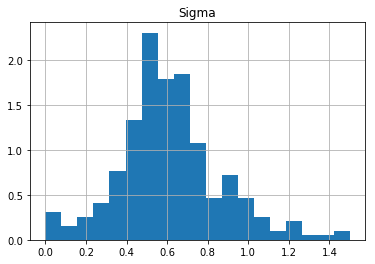

In [37]:
valid_info_frame["Sigma"] = np.abs(valid_info_frame["Sigma"])
bins = np.linspace(0, 1.5, 20)
valid_info_frame.hist("Sigma",  normed = 1, bins = bins)

Average Sigma 0.622108203978 Std in Sigma 0.278100701151
(249, 8)


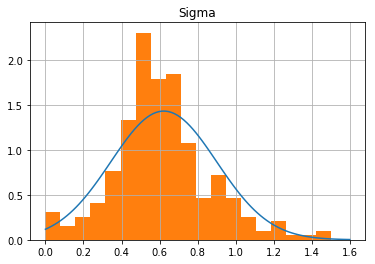

In [38]:
from scipy.stats import norm

mu_fit, sig_fit =  norm.fit(valid_info_frame["Sigma"].values)
print "Average Sigma", mu_fit, "Std in Sigma", sig_fit
#x, xmax = plt.xlim()
fig = plt.figure()
ax = fig.add_subplot("111")
x = np.linspace(0, 1.6, 100)
p = norm.pdf(x, mu_fit, sig_fit)
plt.plot(x, p)
valid_info_frame.hist("Sigma", normed = 1, ax = ax, bins = bins)
print valid_info_frame.shape

print valid_info_frame.shape
#print valid_info_frame.head(2)
print parameters.shape
start = time.time()
summary = np.zeros((valid_info_frame.shape[0],3)) # ID score, p values, A mu sigma
counter = -1
for index_val in range(0,int(parameters.shape[0])):
    index_val =265
    print index_val

    
    if parameters["ID"][index_val] in valid_info_frame["ID"].values:
        counter +=1
        location = np.where(parameters["ID"][index_val] == valid_info_frame["ID"].values)[0][0]
        #print location
        gamma = parameters["Gamma"][index_val]
        alpha = parameters["Alpha"][index_val]
        loc = parameters["Location"][index_val]
        x = np.log10(sub_short["instability_time"].values[index_val])
        #print "Spread", alpha
        #print gamma, alpha, loc, x 
        vals= np.linspace(loc+0.001, loc+alpha*5, 500)
        final_y  = np.zeros(100)
        for i in range(int(vals.shape[0])):
            bins = np.linspace(loc , loc+5*alpha, 100)
            val1 = vals[i]
            #get the entire pdf
            prob = weib_pdf_val(val1, loc, gamma, alpha)
            #get the probability that time being drawn
            y = prob*weib_pdf(bins, val1,gamma, alpha)
            ax.plot(bins, y)#just to prevent any errors
            final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  

        params = valid_info_frame.iloc[location, :]# row with teh correct params
        p0 = [1., loc+alpha*3, alpha] #norm, mean, sigma

        coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0 = p0)
        # Get the fitted curve
        hist_fit = gauss(bins, *coeff)
        print counter#
        score = scipy.stats.shapiro(final_y)
        print score
        summary[counter, 0] = parameters["ID"][index_val]
        summary[counter,1] = score[0]
        summary[counter, 2] = score[1]

        #print scipy.stats.anderson(final_y)

    #break   
end = time.time()
print end-start


0.908405522113


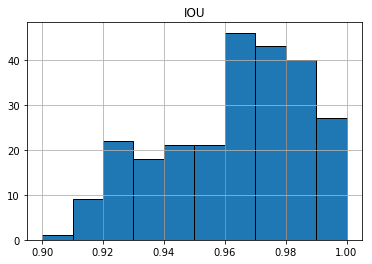

In [55]:
bins = np.linspace(0.90,1, 11)
valid_info_frame.hist("IOU", bins = bins, edgecolor = "black", linewidth = 1)
print valid_info_frame["IOU"].min()

In [3]:
summary_frame = pd.read_csv("../../csvs/Goodness_0f_Fit_Test.csv", index_col =0 )
summary_frame.tail()
#dont worry about 99, that didnt have the gaussian fit converge, so that can be ignored.

,ID,ShapiroScore,P-value
248,67.0,0.516483,1.431862e-16
249,7431.0,0.784115,8.285428e-11
250,8462.0,0.802557,2.968922e-10
251,8744.0,0.924164,2.357212e-05
252,91.0,0.856748,2.122787e-08


2


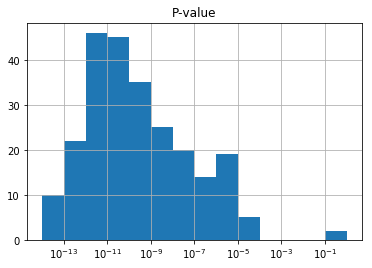

In [8]:
print len(np.where(summary_frame["P-value"] >0.05)[0])
bins = np.logspace(-14, 0, 15)
summary_frame.hist("P-value", bins = bins)
plt.xscale("log")

2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31b21ffe10>]], dtype=object)

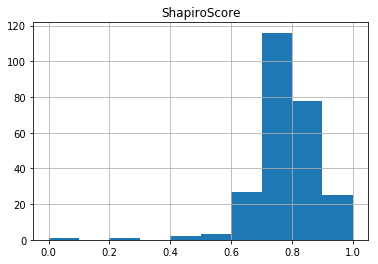

In [7]:
print len(np.where(summary_frame["P-value"] >0.05)[0])
bins = np.logspace(-14, -4, 11)
summary_frame.hist("ShapiroScore")
#plt.xscale("log")